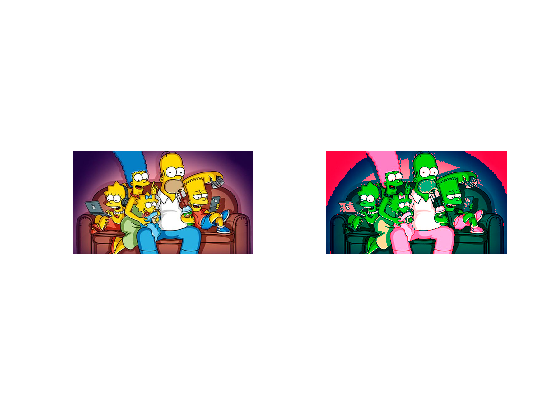

In [1]:

pkg load image

#NORMALIZACIÓN -> consiste en dejar los colores en un rango especifico
ima = imread("simpson.jpg");

sal = ima;

R = ima(:,:,1);
G = ima(:,:,2);
B = ima(:,:,3);

sim = ima; #crea una imagen a partir de la imagen original
[f c] = size(R);

R1 = R;
G1 = G;
B1 = B;

for fi=1:f
    for ci=1:c
        #formula de normalización
        #se realiza pixel a pixel
        #cuando se normaliza los valores son 0 y 1, por eso se multiplica por 255
        R1(fi, ci) = (R(fi,ci))/(R(fi,ci)+(G(fi,ci))+(B(fi,ci)))*255; #se multiplica por 255 por el tamaño resultante
        G1(fi, ci) = (G(fi,ci))/(R(fi,ci)+(G(fi,ci))+(B(fi,ci)))*255;
        B1(fi, ci) = (B(fi,ci))/(R(fi,ci)+(G(fi,ci))+(B(fi,ci)))*255;
        
    endfor
endfor

#recompone la imagen
sal(:,:,1) = R1;
sal(:,:,1) = G1;
sal(:,:,1) = B1;

subplot(1,2,1);
imshow(ima);
subplot(1,2,2);
imshow(sal);
imwrite(sal, "carreteranorm.jpg");
#la normalización elimina degradados y sirve para resaltar regiones


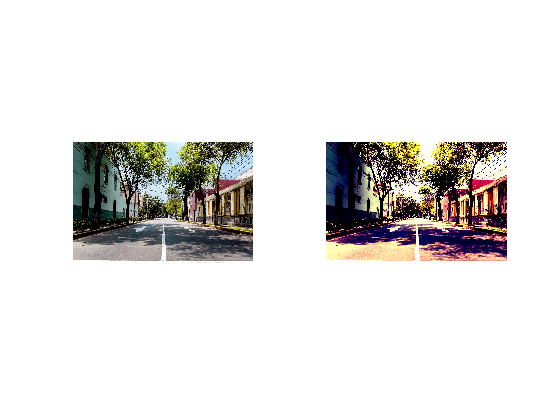

In [2]:
pkg load image

#NORMALIZACIÓN -> consiste en dejar los colores en un rango especifico
ima = imread("calle.png");

sal = ima;
sal1 = ima;

R = ima(:,:,1);
G = ima(:,:,2);
B = ima(:,:,3);

sim = ima; #crea una imagen a partir de la imagen original
[f c] = size(R);

#mejora de la ecualización
R1 = R;
G1 = G;
B1 = B;

R1 = histeq(R);
G1 = histeq(G);
B1 = histeq(B);

sal(:,:,1) = R1*255;
sal(:,:,2) = G1*255;
sal(:,:,3) = B1*255;

sal1 = imadjust(ima,[.2 .3 0 ; .6 .7 1],[]); #baja la iluminación.

subplot(1,2,1);
imshow(ima);
subplot(1,2,2);
imshow(sal1);
imwrite(sal1, "calle_curvaIlum.png");

In [11]:
#ECUALIZACION DE GRISES

%plot gnuplot



ima = imread('calle.png');

sal = ima;

R = ima(:, :, 1);
G = ima(:, :, 2);
B = ima(:, :, 3);

sim = ima;
[f c] = size(R);

R1 = R;
G1 = G;
B1 = B;

grises = rgb2gray(ima); #tambien se puede hacer con la formula de componentes 
# grises_eq = imadjust(grises);
grises_eq = imadjust(grises,[.2; .5], []);#[par ordenado; valor]

subplot(2,1,1)
imshow(grises);
subplot(2,1,2)
imshow(grises_eq);


In [35]:
# ---BW LEVEL ---

ima = imread('simpson.jpg');

sal = ima;

R = ima(:, :, 1);
G = ima(:, :, 2);
B = ima(:, :, 3);

sim = ima;
[f c] = size(R);

R1 = R;
G1 = G;
B1 = B;

# Se debe definir una imagen binaria
binaria = im2bw(ima);
regiones =bwlabel(binaria);
#para sacar la parte especifica se utiliza roicolor
s = roicolor(regiones,179, 180);

for fi =1:f
    for ci=1:c
        if(s(fi,ci) == false)
            R1(fi,ci)=0;
            G1(fi,ci)=0;
            B1(fi,ci)=0;        
        endif    
    endfor
endfor

sal(:,:,1)=R1;
sal(:,:,2)=G1;
sal(:,:,3)=B1;


subplot(2,1,1)
imshow(s);
subplot(2,1,2)
#imwrite(s,"homero_region179_180.jpg")
imshow(sal); #muestra blanco y negro, cada region es un area cerrada (cuerpo especifico)